# Exploratory Data Analysis + Model Training

In [1]:
import os
from pathlib import Path
# if this notebook lives in /notebooks, its parent is your project root
PROJECT_ROOT = Path.cwd().parent
os.chdir(PROJECT_ROOT)            # now wd = project root
print("cwd is now:", os.getcwd())  # just to confirm

# (optionally) also put src/ on your path if you haven't already
import sys
sys.path.insert(0, str(PROJECT_ROOT/"src"))


cwd is now: /home/asen/School/COSC4337/final_project/4337_proj


In [4]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path.cwd()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("First sys.path entry:", sys.path[0])

from src.config          import DATA_CONFIG, TRAINING_CONFIG
from src.data_processing import load_data, create_sequences, split_data

DATA_DIR   = PROJECT_ROOT / "data"
MODEL_DIR  = PROJECT_ROOT / "models"
VIS_DIR    = PROJECT_ROOT / "visualizations"
for d in (DATA_DIR, MODEL_DIR, VIS_DIR):
    d.mkdir(exist_ok=True, parents=True)


First sys.path entry: /home/asen/School/COSC4337/final_project/4337_proj


In [5]:
df = pd.read_csv(DATA_DIR/"all_industries.csv", parse_dates=["date"])
df.head()

,date,industry,y,avg_weekly_hours_all,avg_hourly_earnings_all,production_employees_thousands,avg_weekly_hours_production,avg_hourly_earnings_production,unemployment_rate,openings_thousands,hires_thousands,separations_thousands
0,2006-03-01,Construction,7689.0,37.5,21.85,5911.0,38.8,19.66,8.5,180.0,504.0,448.0
1,2006-03-01,Education and Health Services,18042.0,32.6,20.02,15732.0,32.5,17.10,3.0,714.0,451.0,407.0
2,2006-03-01,Financial Activities,8350.0,36.8,24.11,6273.0,35.7,18.51,3.1,357.0,226.0,225.0
3,2006-03-01,Information,3055.0,36.4,26.77,2403.0,36.6,22.95,3.5,113.0,84.0,82.0
4,2006-03-01,Leisure and Hospitality,13034.0,26.2,11.49,11490.0,25.6,9.60,8.0,556.0,942.0,695.0


In [6]:
print(df.shape)
print(df['industry'].nunique(), "industries from", df.date.min(), "to", df.date.max())
df.isna().sum()

(2260, 12)
10 industries from 2006-03-01 00:00:00 to 2024-12-01 00:00:00


date                              0
industry                          0
y                                 0
avg_weekly_hours_all              0
avg_hourly_earnings_all           0
production_employees_thousands    0
avg_weekly_hours_production       0
avg_hourly_earnings_production    0
unemployment_rate                 0
openings_thousands                0
hires_thousands                   0
separations_thousands             0
dtype: int64

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,2260,2015-07-17 06:03:11.150442496,2006-03-01 00:00:00,2010-11-01 00:00:00,2015-07-16 12:00:00,2020-04-01 00:00:00,2024-12-01 00:00:00,NaN
y,2260.0,11997.684956,539.0,5516.0,9200.0,18864.75,29033.0,8307.386797
avg_weekly_hours_all,2260.0,35.810398,24.1,32.9,36.3,38.9,46.8,4.812954
avg_hourly_earnings_all,2260.0,27.471637,11.49,22.5875,27.105,31.7825,51.48,7.459533
production_employees_thousands,2260.0,9854.726549,392.0,4518.5,7068.5,15961.75,24613.0,7173.665565
avg_weekly_hours_production,2260.0,35.655088,22.2,32.2,35.7,39.4,48.5,5.595752
avg_hourly_earnings_production,2260.0,23.277978,9.6,19.0375,23.105,26.96,41.78,6.223027
unemployment_rate,2260.0,5.977478,0.3,3.6,5.1,7.4,39.3,3.546787
openings_thousands,2260.0,526.927876,3.0,146.75,347.0,789.25,2459.0,498.264999
hires_thousands,2260.0,489.347788,11.0,171.0,347.5,841.0,2301.0,404.997976


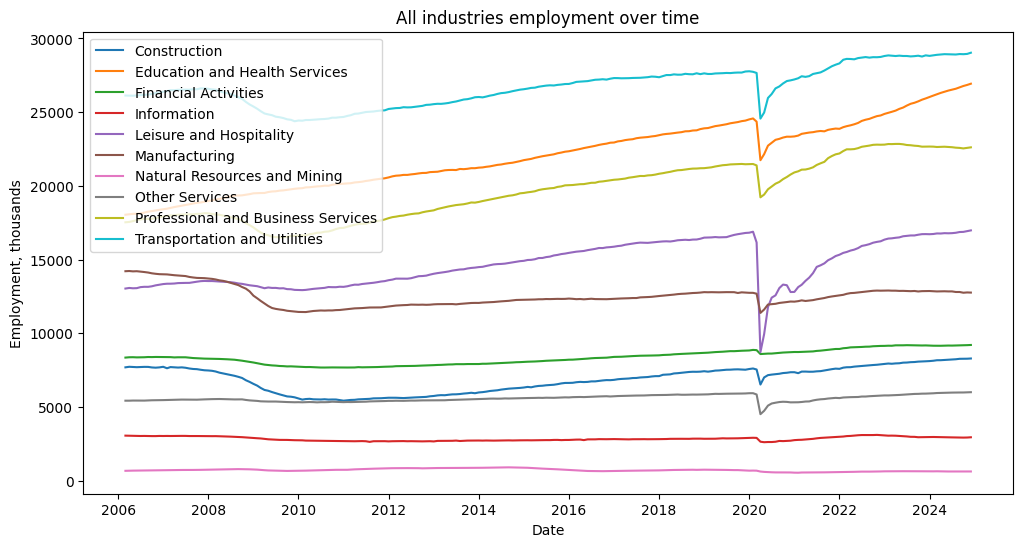

In [8]:
industries = df.industry.unique()
plt.figure(figsize=(12, 6))
for ind in industries:
    sub = df[df.industry == ind]
    plt.plot(sub.date, sub.y, label=ind)
plt.legend()
plt.title("All industries employment over time")
plt.xlabel("Date")
plt.ylabel("Employment, thousands")
plt.savefig(VIS_DIR/"all_industries_employment.png", bbox_inches='tight')
plt.show()
plt.close()

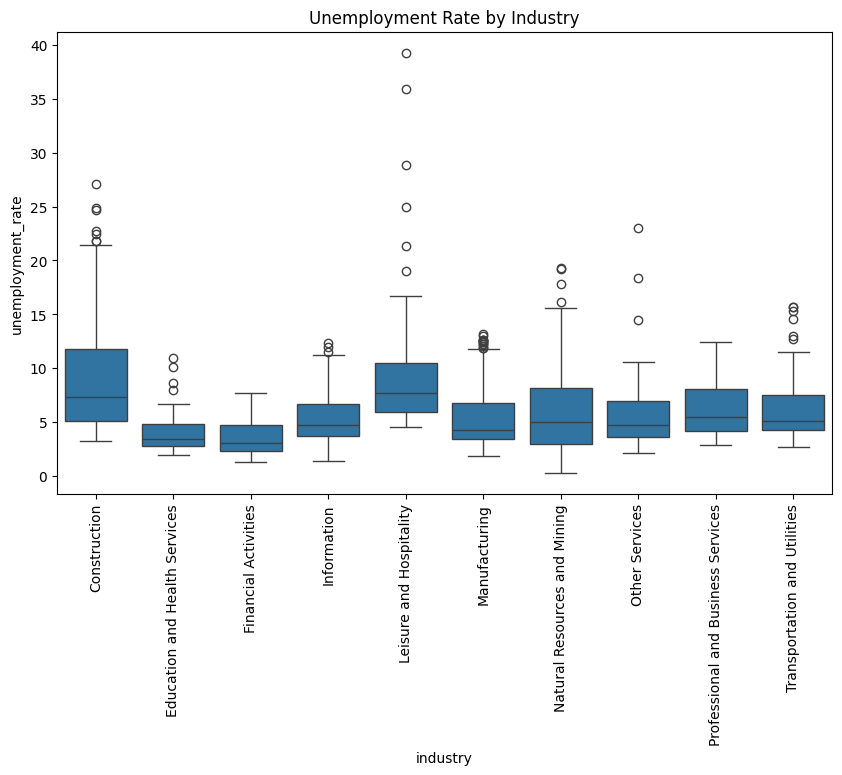

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="industry", y="unemployment_rate", data=df)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Industry")
plt.savefig(VIS_DIR/"unemp_rate_boxplot.png")
plt.show()
plt.close()

/tmp/ipykernel_17871/2520994381.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  corr = wide.resample("A").mean().corr()


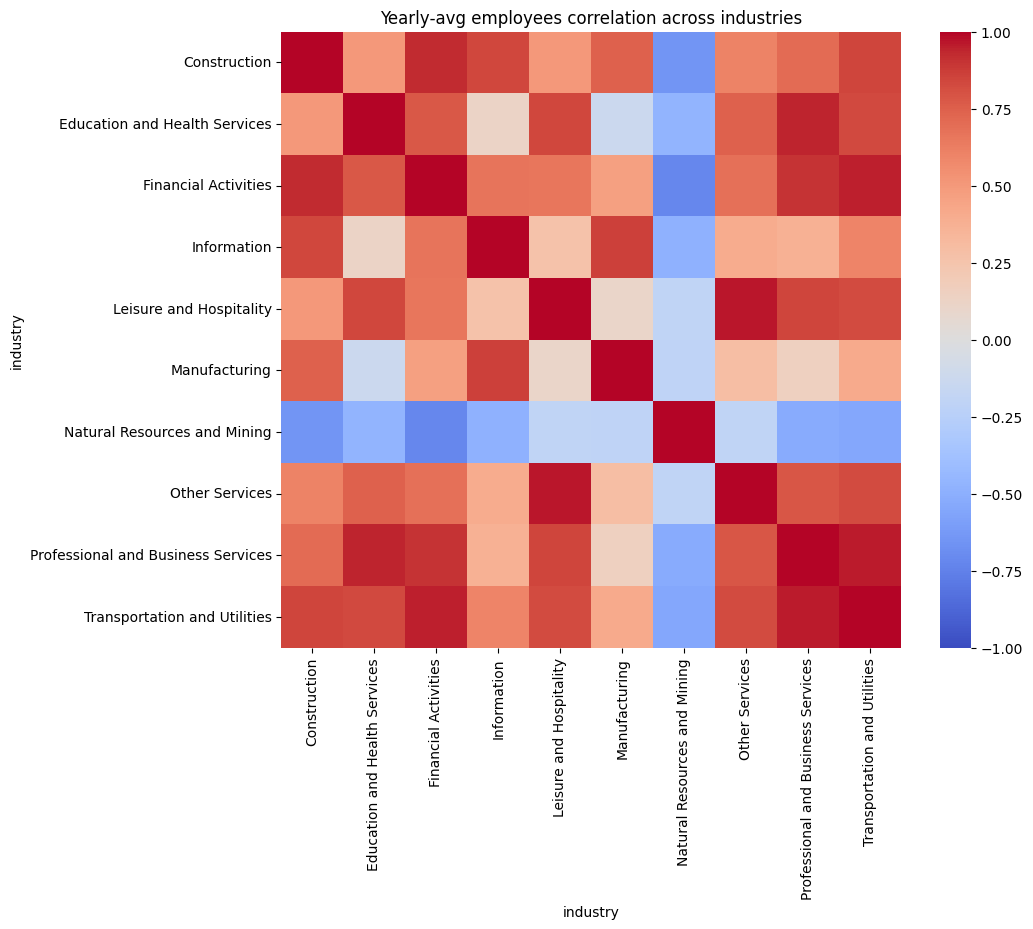

In [10]:
wide = df.pivot(index="date", columns="industry", values="y")
corr = wide.resample("A").mean().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Yearly‐avg employees correlation across industries")
plt.savefig(VIS_DIR/"employees_corr_heatmap.png")
plt.show()
plt.close()

In [11]:
from config import DATA_CONFIG, TRAINING_CONFIG
from data_processing import load_data, create_sequences, split_data

# 1) load & scale
dates, X_scaled, y_scaled, scaler_X, scaler_y, feature_names = load_data(data_file="all_industries.csv")

# 2) save scalers
import joblib
joblib.dump((scaler_X, scaler_y, feature_names), MODEL_DIR/"scaler.joblib")

# 3) build sequences on features X and target y
X_seq, y_seq = create_sequences(X_scaled, y_scaled)

# 4) split into train/val/test
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X_seq, y_seq)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)



Shapes: torch.Size([1438, 12, 19]) torch.Size([360, 12, 19]) torch.Size([450, 12, 19])
